In [2]:
#My default packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from dataclasses import dataclass
import itertools
import heapq


# Day 9

In [37]:
moves = pd.read_csv("input9.txt",delim_whitespace=True,header=None,names=["Dir","Amount"])
moves = np.array(moves)

In [38]:
@dataclass
class Rope:
    Hx : int = 0
    Hy : int = 0
    Tx : int = 0
    Ty : int = 0

    def __init__(self) -> None:
        self._taillog = {(0,0)}

    def move(self,dir,n):
        if dir=="U": self.Hy+=n
        elif dir=="L": self.Hx-=n
        elif dir=="D": self.Hy-=n
        elif dir=="R": self.Hx+=n
        else: raise ValueError(f"Wrong direction {dir}")
        # print(self)
        if (dist := abs(self.Hx-self.Tx))>1:
            # print("Move tail hor", dist)
            dir = np.sign(self.Hx-self.Tx)
            if self.Hy!=self.Ty:
                # print("Correct column tail")
                self.Ty=self.Hy #Perform the diagonal move without logging
            while dist>1:
                self.Tx+=dir
                dist-=1
                self._taillog.add((self.Tx,self.Ty))
        elif (dist := abs(self.Hy-self.Ty))>1:
            # print("Move tail vert", dist)

            dir = np.sign(self.Hy-self.Ty)
            if self.Hx!=self.Tx:
                # print("Correct row tail")

                self.Tx=self.Hx #Perform the diagonal move without logging
            while dist>1:
                self.Ty+=dir
                dist-=1
                self._taillog.add((self.Tx,self.Ty))

    def tailtourism(self): return len(self._taillog)

In [39]:
rope = Rope()
for d,n in moves:
    # print(d,n,rope)
    rope.move(d,n)
rope.tailtourism()

5683

In [40]:
class LongRope:

    def __init__(self,n) -> None:
        self.xy = np.zeros((n,2),dtype=int) #Head is 0
        self.n = n
        self._taillog = [(0,0)]
        self._dirs = {"U":np.array([0,1]),"D":np.array([0,-1]),"R":np.array([1,0]),"L":np.array([-1,0])}

    def __repr__(self) -> str:
        return self.xy.__repr__()

    def move(self,dir,n):
        for _ in range(n):
            self.atomicmove(dir)

    def atomicmove(self,dir):
        self.xy[0] += self._dirs[dir]
        for k in range(1,self.n):
            locH = self.xy[k-1]
            dr = locH - self.xy[k]
            if abs(dr).max()>1:
                self.xy[k]+=np.sign(dr)
        self._taillog.append(tuple(self.xy[-1]))

    def tailtourism(self): return len(set(self._taillog))

    def plot(self):
        fig,ax = plt.subplots()
        ax.plot(*(np.array(self._taillog).T),)
        ax.grid(True)

In [41]:
rope = LongRope(10)
for d,n in moves:
    # print(d,n,rope)
    rope.move(d,n)
rope.tailtourism()

2372

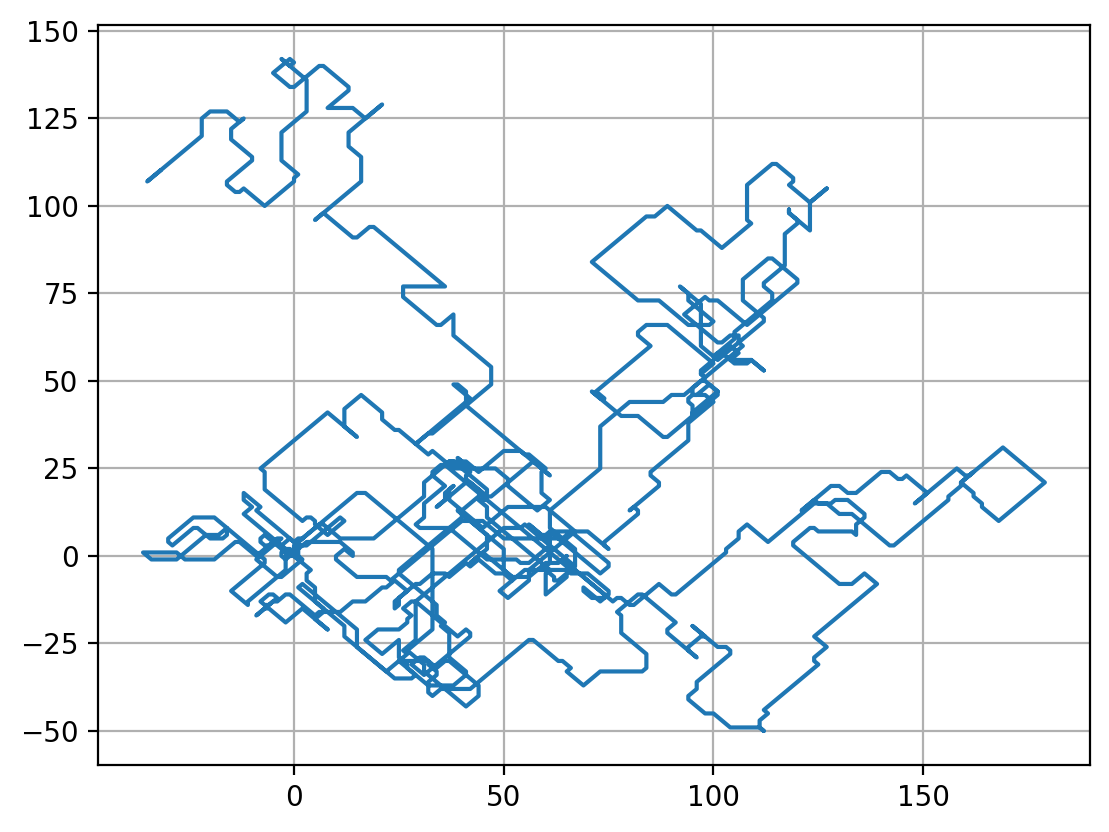

In [42]:
rope.plot()